In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import yfinance as yf

# 1.- Collect the data

In [3]:
now = datetime.now() # take the current data time

# download the data-set(df) from Yahoo-Finance (10 years)
start = datetime(now.year-10, now.month, now.day)
ticker = 'MSFT'
df = yf.download(tickers='MSFT', start=start, end=now, auto_adjust=False) # ticker is the stock symbol, we choose "start" from 10 years ago and the end is until now
df

[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker            MSFT        MSFT        MSFT        MSFT        MSFT   
Date                                                                     
2015-07-06   38.490150   44.389999   44.480000   43.950001   43.959999   
2015-07-07   38.412117   44.299999   44.490002   43.320000   44.340000   
2015-07-08   38.360092   44.240002   44.900002   44.029999   44.439999   
2015-07-09   38.602867   44.520000   45.220001   44.500000   44.750000   
2015-07-10   38.680908   44.610001   45.139999   44.570000   45.009998   
...                ...         ...         ...         ...         ...   
2025-06-27  495.940002  495.940002  499.299988  493.029999  497.549988   
2025-06-30  497.410004  497.410004  500.760010  495.329987  497.040009   
2025-07-01  492.049988  492.049988  498.049988  490.980011  496.470001   
2025-07-02  491.089996  491.089996  493.500000  488.700012  489.989990   
2025-07-03  498.839996  498.839996  500.130005  493.440002  493.809998   

Price         Volume  
Ticker          MSFT  
Date                  
2015-07-06  23034000  
2015-07-07  36435800  
2015-07-08  39785900  
2015-07-09  32424700  
2015-07-10  25465800  
...              ...  
2025-06-27  34539200  
2025-06-30  28369000  
2025-07-01  19945400  
2025-07-02  16319600  
2025-07-03  13984800  

[2515 rows x 6 columns]

In [4]:
df.columns = df.columns.droplevel(1) # we eliminate the Ticker column
df

Price        Adj Close       Close        High         Low        Open  \
Date                                                                     
2015-07-06   38.490150   44.389999   44.480000   43.950001   43.959999   
2015-07-07   38.412117   44.299999   44.490002   43.320000   44.340000   
2015-07-08   38.360092   44.240002   44.900002   44.029999   44.439999   
2015-07-09   38.602867   44.520000   45.220001   44.500000   44.750000   
2015-07-10   38.680908   44.610001   45.139999   44.570000   45.009998   
...                ...         ...         ...         ...         ...   
2025-06-27  495.940002  495.940002  499.299988  493.029999  497.549988   
2025-06-30  497.410004  497.410004  500.760010  495.329987  497.040009   
2025-07-01  492.049988  492.049988  498.049988  490.980011  496.470001   
2025-07-02  491.089996  491.089996  493.500000  488.700012  489.989990   
2025-07-03  498.839996  498.839996  500.130005  493.440002  493.809998   

Price         Volume  
Date                  
2015-07-06  23034000  
2015-07-07  36435800  
2015-07-08  39785900  
2015-07-09  32424700  
2015-07-10  25465800  
...              ...  
2025-06-27  34539200  
2025-06-30  28369000  
2025-07-01  19945400  
2025-07-02  16319600  
2025-07-03  13984800  

[2515 rows x 6 columns]

# 2.- Data Exploration & Visualization
For this step we usually visualize the type of the data (should be a DataFrame), the shape of the data, check if we have null values to drop that values (shouldnt be null values because of yahoo) and the statistical overview of the data-frame

In [5]:
type(df) # data type

pandas.core.frame.DataFrame

In [6]:
df.shape # data shape

(2515, 6)

In [7]:
df.isna().sum()  # chceck if we have null values (if we have zeros it means that we do not have null)

Price
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [8]:
df.describe() # statistical overview

Price    Adj Close        Close         High          Low         Open  \
count  2515.000000  2515.000000  2515.000000  2515.000000  2515.000000   
mean    200.441601   206.564004   208.462604   204.443805   206.480243   
std     129.605710   128.631668   129.708864   127.402364   128.565849   
min      35.322571    40.470001    42.590000    39.720001    40.450001   
25%      79.513115    86.149998    86.799999    85.450001    86.250000   
50%     192.862686   201.300003   203.649994   197.509995   200.050003   
75%     295.457550   304.284988   307.800003   301.100006   304.210007   
max     498.839996   498.839996   500.760010   495.329987   497.549988   

Price        Volume  
count  2.515000e+03  
mean   2.819733e+07  
std    1.275602e+07  
min    7.164500e+06  
25%    2.011325e+07  
50%    2.494650e+07  
75%    3.248800e+07  
max    1.352271e+08

In [9]:
df.dtypes # the types of the columns

Price
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object

In [10]:
df = df.reset_index() # we reset the data-fram to have the posotions of each row
df.head()

Price       Date  Adj Close      Close       High        Low       Open  \
0     2015-07-06  38.490150  44.389999  44.480000  43.950001  43.959999   
1     2015-07-07  38.412117  44.299999  44.490002  43.320000  44.340000   
2     2015-07-08  38.360092  44.240002  44.900002  44.029999  44.439999   
3     2015-07-09  38.602867  44.520000  45.220001  44.500000  44.750000   
4     2015-07-10  38.680908  44.610001  45.139999  44.570000  45.009998   

Price    Volume  
0      23034000  
1      36435800  
2      39785900  
3      32424700  
4      25465800

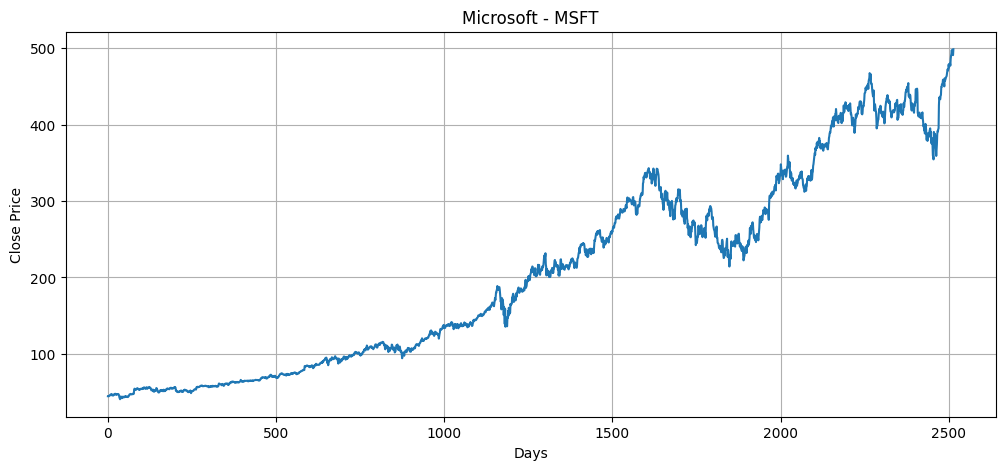

In [11]:
# visualization of the data
plt.figure(figsize=(12,5)) # change the size of the data-frame
plt.plot(df['Close'])
plt.title('Microsoft - MSFT')
plt.xlabel('Days')
plt.grid(True)
plt.ylabel('Close Price');

# 4.- Feature Engineering
Moving average of the stock. To identify the stock trend, usually is used the "moving average". This will give you the smooth pattern of the stock trends

In [12]:
# 100 days Moving Average
df['MA_100'] = df['Close'].rolling(100).mean() # create the column MA_100(Moving Average of 100 days) and we calculate the "mean" of the 100 days


In [13]:
df.head(105) #the first 99 registers will be null(NaN) because we wanted to know the moving average of the 100 days
# From record 99 onwards there are already results

Price       Date  Adj Close      Close       High        Low       Open  \
0     2015-07-06  38.490150  44.389999  44.480000  43.950001  43.959999   
1     2015-07-07  38.412117  44.299999  44.490002  43.320000  44.340000   
2     2015-07-08  38.360092  44.240002  44.900002  44.029999  44.439999   
3     2015-07-09  38.602867  44.520000  45.220001  44.500000  44.750000   
4     2015-07-10  38.680908  44.610001  45.139999  44.570000  45.009998   
..           ...        ...        ...        ...        ...        ...   
100   2015-11-24  47.669010  54.250000  54.439999  53.580002  53.919998   
101   2015-11-25  47.176956  53.689999  54.230000  53.689999  54.090000   
102   2015-11-27  47.387825  53.930000  54.080002  53.790001  53.799999   
103   2015-11-30  47.756889  54.349998  54.959999  54.000000  54.540001   
104   2015-12-01  48.521343  55.220001  55.230000  54.299999  54.410000   

Price    Volume   MA_100  
0      23034000      NaN  
1      36435800      NaN  
2      39785900      NaN  
3      32424700      NaN  
4      25465800      NaN  
..          ...      ...  
100    24600000  47.2780  
101    21005100  47.3719  
102     9009100  47.4688  
103    56241400  47.5671  
104    39952800  47.6732  

[105 rows x 8 columns]

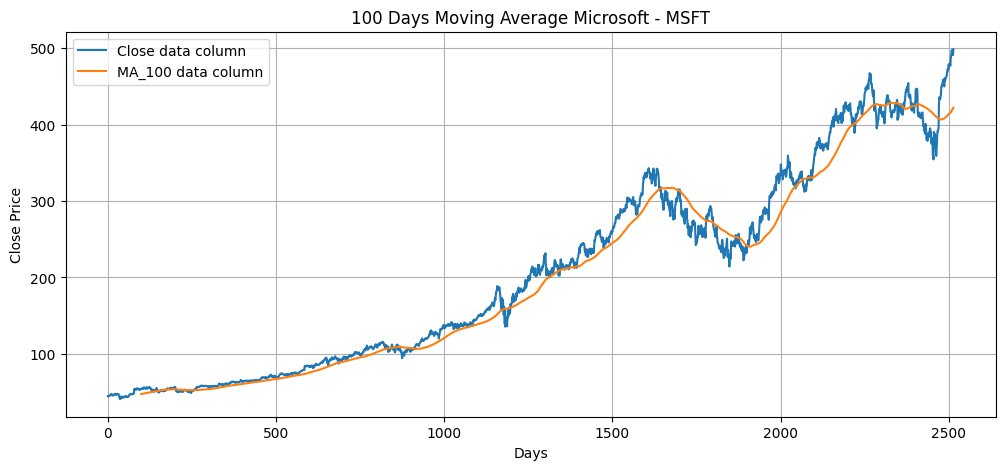

In [14]:
# visualization of the data
plt.figure(figsize=(12,5)) # change the size of the data-frame
plt.plot(df['Close'], label="Close data column")
plt.plot(df['MA_100'], label="MA_100 data column")
plt.legend()
plt.title('100 Days Moving Average Microsoft - MSFT')
plt.xlabel('Days')
plt.grid(True)
plt.ylabel('Close Price');

In [15]:
# 200 days Moving Average
df['MA_200'] = df['Close'].rolling(200).mean() # create the column MA_200(Moving Average of 200 days) and we calculate the "mean" of the 200 days
df.head(203)

Price       Date  Adj Close      Close       High        Low       Open  \
0     2015-07-06  38.490150  44.389999  44.480000  43.950001  43.959999   
1     2015-07-07  38.412117  44.299999  44.490002  43.320000  44.340000   
2     2015-07-08  38.360092  44.240002  44.900002  44.029999  44.439999   
3     2015-07-09  38.602867  44.520000  45.220001  44.500000  44.750000   
4     2015-07-10  38.680908  44.610001  45.139999  44.570000  45.009998   
..           ...        ...        ...        ...        ...        ...   
198   2016-04-18  49.967129  56.459999  56.590000  55.209999  55.490002   
199   2016-04-19  49.905178  56.389999  56.770000  55.680000  56.630001   
200   2016-04-20  49.197170  55.590000  56.500000  55.490002  56.290001   
201   2016-04-21  49.365322  55.779999  56.230000  55.419998  55.799999   
202   2016-04-22  45.825317  51.779999  52.430000  50.770000  51.910000   

Price     Volume   MA_100    MA_200  
0       23034000      NaN       NaN  
1       36435800      NaN       NaN  
2       39785900      NaN       NaN  
3       32424700      NaN       NaN  
4       25465800      NaN       NaN  
..           ...      ...       ...  
198     23786000  53.4819       NaN  
199     29596800  53.5039  50.34165  
200     36195700  53.5173  50.39765  
201     38909100  53.5382  50.45505  
202    126834100  53.5167  50.49275  

[203 rows x 9 columns]

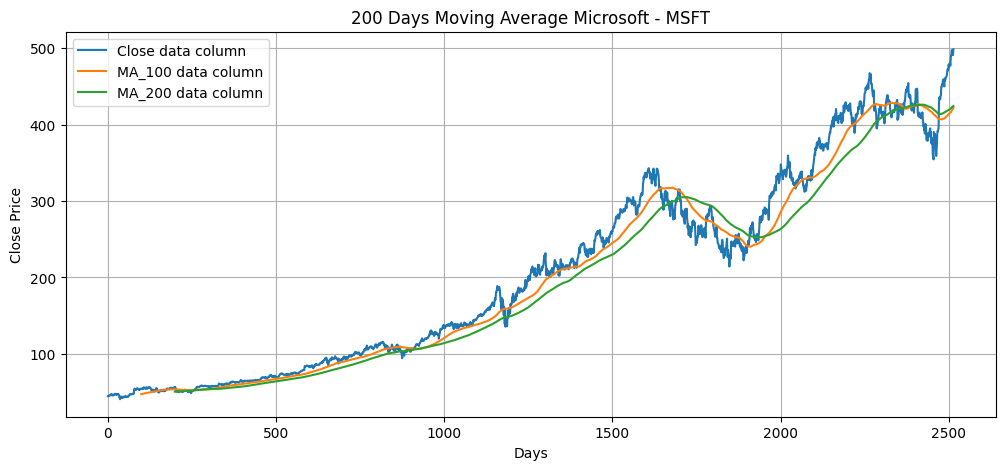

In [16]:
# visualization of the data
plt.figure(figsize=(12,5)) # change the size of the data-frame
plt.plot(df['Close'], label="Close data column")
plt.plot(df['MA_100'], label="MA_100 data column")
plt.plot(df['MA_200'], label="MA_200 data column")
plt.legend()
plt.title('200 Days Moving Average Microsoft - MSFT')
plt.xlabel('Days')
plt.grid(True)
plt.ylabel('Close Price');

### Calculating the % changed in each trading session. calcula la diferencia relativa (en porcentaje) entre el valor actual y el anterior. Es una métrica fundamental en finanzas para analizar la volatilidad o rendimiento de un activo.
Primera fila: Siempre será NaN (no hay dato anterior).

In [17]:
# Calculating the % changed in each trading session (in decimals)
df['Porcentage Changed'] = df['Close'].pct_change() # create a new column(Porcentage Changed) and we calculate the porcentage changed based on the "Close" column
df[['Close', 'Porcentage Changed']] # print to see the differences

Price       Close  Porcentage Changed
0       44.389999                 NaN
1       44.299999           -0.002027
2       44.240002           -0.001354
3       44.520000            0.006329
4       44.610001            0.002022
...           ...                 ...
2510   495.940002           -0.003036
2511   497.410004            0.002964
2512   492.049988           -0.010776
2513   491.089996           -0.001951
2514   498.839996            0.015781

[2515 rows x 2 columns]

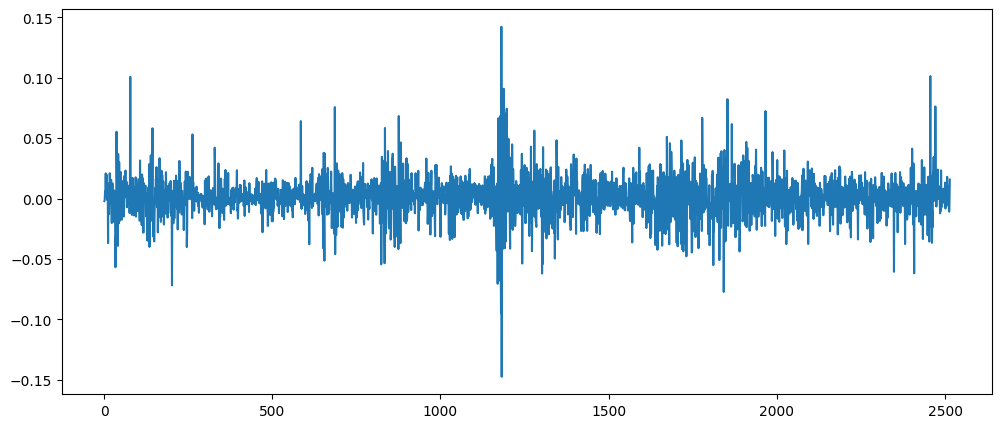

In [18]:
# visualization of the data
plt.figure(figsize=(12,5)) # change the size of the data-frame
plt.plot(df['Porcentage Changed'])

# 4.- Data PreProcessing
We will split our data preprocessing in  2 parts: training and testing data.
We will use the 70% of the data for the Training and the 30% for the testing
Its very common in machine learning to split the data into testing and training
Our model will learn from the 70% data. Once our model is trained we will ask for the 30%

In [19]:
df.shape

(2515, 10)

In [20]:
# split the data into training and and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)]) # create the training_data with the 70% of the 'Close' column
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))]) # create the testing_data from the 70% of the data to the rest of the length

In [21]:
# convert the prices into 0/1 (scaling down the data between 0 and 1)
# this is because of the LSTM, its important to do this
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01295268],
       [0.01265529],
       [0.01245705],
       ...,
       [0.74154119],
       [0.71375238],
       [0.72624247]])

# 5.- Sequence Creation
LSTM requires the input data to be in a sequential manner: Tomorrow´s stock price is dependent on previous few days stock prices

In [23]:
x_train = []
y_train = []

# it will learn 100 data and predict the next day price (that will be the y_train) based on the data_training_array
for i in range(100, data_training_array.shape[0]): # .shape[0] gives you the length of the data_training
    x_train.append(data_training_array[i-100: i]) # we want to start from 0, so we do the rest i - 100 ("i" starts in 1)
    y_train.append(data_training_array[i,0])

x_train

[array([[0.01295268],
        [0.01265529],
        [0.01245705],
        [0.01338223],
        [0.01367962],
        [0.01675258],
        [0.01701691],
        [0.0174795 ],
        [0.02045334],
        [0.02032117],
        [0.02131244],
        [0.02250198],
        [0.01675258],
        [0.018636  ],
        [0.01807427],
        [0.01612476],
        [0.01609172],
        [0.01923077],
        [0.02118028],
        [0.02058551],
        [0.02094898],
        [0.02336109],
        [0.02349326],
        [0.02032117],
        [0.02071769],
        [0.0226672 ],
        [0.01962728],
        [0.02071769],
        [0.02068464],
        [0.02157679],
        [0.02263415],
        [0.02246894],
        [0.02028813],
        [0.01714908],
        [0.00859106],
        [0.00399815],
        [0.        ],
        [0.00740153],
        [0.0113336 ],
        [0.01143272],
        [0.01007798],
        [0.00446074],
        [0.0095493 ],
        [0.01001189],
        [0.00707111],
        [0

In [24]:
x_train, y_train = np.array(x_train), np.array(y_train) # we convert the x_train and y_train in a numpy array
x_train # 3 dimentional array

array([[[0.01295268],
        [0.01265529],
        [0.01245705],
        ...,
        [0.04450832],
        [0.04533438],
        [0.04533438]],

       [[0.01265529],
        [0.01245705],
        [0.01338223],
        ...,
        [0.04533438],
        [0.04533438],
        [0.04553264]],

       [[0.01245705],
        [0.01338223],
        [0.01367962],
        ...,
        [0.04533438],
        [0.04553264],
        [0.04368226]],

       ...,

       [[0.88649889],
        [0.90202883],
        [0.86168389],
        ...,
        [0.7026831 ],
        [0.72161643],
        [0.75082614]],

       [[0.90202883],
        [0.86168389],
        [0.87718086],
        ...,
        [0.72161643],
        [0.75082614],
        [0.74154119]],

       [[0.86168389],
        [0.87718086],
        [0.86069265],
        ...,
        [0.75082614],
        [0.74154119],
        [0.71375238]]])

In [25]:
x_train.ndim # 3 dimentional numpy array

3

In [26]:
y_train

array([0.04553264, 0.04368226, 0.04447528, ..., 0.74154119, 0.71375238,
       0.72624247])

In [27]:
y_train.ndim

1

# 6.- Model Building
Now, we are going to build the machine learning model with Tensorflow, this package is a framework for numerical computation and machine learning. It provides various tools for building and deploying deep learning models and Keras is a high level API for building and training Neural Networks  

In [37]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [36]:
# ML model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [38]:
model = Sequential() # initialize the sequential model

model.add(Input(shape=(100,1))) # this model will expect 100 previous day's data with 1 feature ('Close' price)

# first LSTM layer
model.add(LSTM(units=128, activation='tanh', return_sequences=True)) # this will give the sequence of output
# we want this LSTM layer to have 128 Neurons.
# 'tanh' = hyperbolic tangent, this helps the Network to handle positive and negative values
# return_sequences = True, this is because we want this layer to return the full sequence
# this will produce the output for each of those 100 steps

# second LSTM layer
model.add(LSTM(units=64)) # this second LSTM layer will take the sequence of output that was generated by the first LSTM layer
# the sequence of output will go inside of another LSTM model
# we won´t return the sequence, so we don´t put return_sequence. this will generate a single output

# first Dense layer
model.add(Dense(25))
# this will take a single output generated in the second LSTM layer
# it will analyze it in 25 different angles (Dense(25))

# second Danse layer
model.add(Dense(1))
# this will take the 25 outputs from the previous Dense layer (first Dense layer) and combines them into a single output
# this will give you the final prediction of price

# 7.- Model training

In [39]:
model.compile(optimizer='adam', loss='mean_squared_error') # this is the optimizing algorithm that we use to compile the model

model.fit(x_train, y_train, epochs=50)
# we add the training models
# epochs = go through this x_train and y_train 50 times (read the data 50 times)
# press enter and it it will start learning 50 times

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - loss: 0.0489
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 5.1862e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 4.8502e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 4.3694e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 4.1386e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - loss: 3.8214e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - loss: 4.4803e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 3.7782e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - loss: 4.0264e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - loss: 4.0738e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - loss: 3.2647e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 3.8050e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 3.7635e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - loss: 3.4437

In [40]:
model.summary() # model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [41]:
# SAVE THE MODEL
model.save('stock_prediction_model.keras')
# we do not want to train out model again and again if ypu ewant to predict the different stock
# we will use this model in our app, we will just use this pre-trained model

# 8.- Preparing Test Data (data_testing)

In [28]:
data_testing

Close
1760  256.829987
1761  259.579987
1762  262.850006
1763  266.209991
1764  268.399994
...          ...
2510  495.940002
2511  497.410004
2512  492.049988
2513  491.089996
2514  498.839996

[755 rows x 1 columns]

In [29]:
past_100_days = data_training.tail(100)
past_100_days

Close
1660  305.940002
1661  300.950012
1662  304.559998
1663  311.209991
1664  302.380005
...          ...
1755  258.859985
1756  267.700012
1757  264.890015
1758  256.480011
1759  260.260010

[100 rows x 1 columns]

In [30]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Close
0    305.940002
1    300.950012
2    304.559998
3    311.209991
4    302.380005
..          ...
850  495.940002
851  497.410004
852  492.049988
853  491.089996
854  498.839996

[855 rows x 1 columns]

In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.3221828 ],
       [0.30464884],
       [0.3173337 ],
       [0.34070063],
       [0.30967359],
       [0.28388211],
       [0.28374153],
       [0.30296216],
       [0.29955375],
       [0.26873752],
       [0.25889874],
       [0.25816087],
       [0.23198282],
       [0.28230084],
       [0.29185846],
       [0.29705896],
       [0.28356588],
       [0.3019783 ],
       [0.28697429],
       [0.2656804 ],
       [0.22720406],
       [0.21645176],
       [0.26090165],
       [0.2506764 ],
       [0.23128012],
       [0.21852491],
       [0.25615796],
       [0.28159814],
       [0.28451457],
       [0.30282158],
       [0.29835906],
       [0.31557679],
       [0.29951858],
       [0.31571737],
       [0.31424152],
       [0.33890865],
       [0.35545875],
       [0.35001225],
       [0.33051055],
       [0.33441096],
       [0.35391266],
       [0.33954112],
       [0.29955375],
       [0.30612459],
       [0.29066377],
       [0.24951689],
       [0.2382726 ],
       [0.257

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i,0])


In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)

# 9.- Making Prediction

In [42]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


In [43]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_predicted

array([263.32748, 261.8415 , 261.03418, 261.49762, 263.1822 , 265.4768 ,
       267.23636, 267.52777, 264.4349 , 260.67786, 257.99103, 257.0606 ,
       256.46176, 257.46805, 259.53848, 262.15417, 263.18268, 262.93253,
       260.50665, 262.05276, 266.67685, 272.46844, 276.47318, 277.8343 ,
       279.83633, 281.81097, 283.0192 , 282.90164, 282.88333, 284.80743,
       286.35428, 288.74078, 291.23312, 292.87097, 293.3534 , 292.96674,
       291.26245, 287.27692, 283.32648, 280.37292, 279.47693, 276.76718,
       273.47443, 270.31055, 267.67935, 265.68375, 263.36676, 260.8383 ,
       260.05777, 260.2211 , 262.1601 , 264.81512, 263.33585, 260.69263,
       256.56485, 252.75528, 249.94833, 247.72517, 245.45735, 244.18819,
       242.89948, 241.78973, 240.75523, 241.0288 , 240.91542, 239.59735,
       239.85265, 242.51678, 245.58435, 247.48068, 245.46597, 241.24821,
       236.32751, 232.38025, 231.59628, 231.03024, 232.66286, 235.04982,
       236.73152, 237.6327 , 239.33035, 242.10843, 

In [44]:
y_test

array([256.82998657, 259.57998657, 262.8500061 , 266.20999146,
       268.3999939 , 267.66000366, 264.51000977, 253.66999817,
       252.72000122, 254.08000183, 256.72000122, 254.25      ,
       259.52999878, 262.26998901, 264.83999634, 260.35998535,
       258.82998657, 251.8999939 , 268.73999023, 276.41000366,
       280.73999023, 278.01000977, 274.82000732, 282.47000122,
       283.6499939 , 282.91000366, 280.32000732, 282.29998779,
       289.16000366, 287.01998901, 291.91000366, 293.47000122,
       292.70999146, 291.32000732, 290.17001343, 286.1499939 ,
       277.75      , 276.44000244, 275.79000854, 278.8500061 ,
       268.08999634, 265.23001099, 262.97000122, 261.47000122,
       260.3999939 , 256.05999756, 253.25      , 258.08999634,
       258.51998901, 264.45999146, 266.6499939 , 251.99000549,
       252.22000122, 245.38000488, 244.74000549, 244.52000427,
       242.44999695, 238.94999695, 240.97999573, 237.91999817,
       237.44999695, 236.41000366, 241.07000732, 237.5 

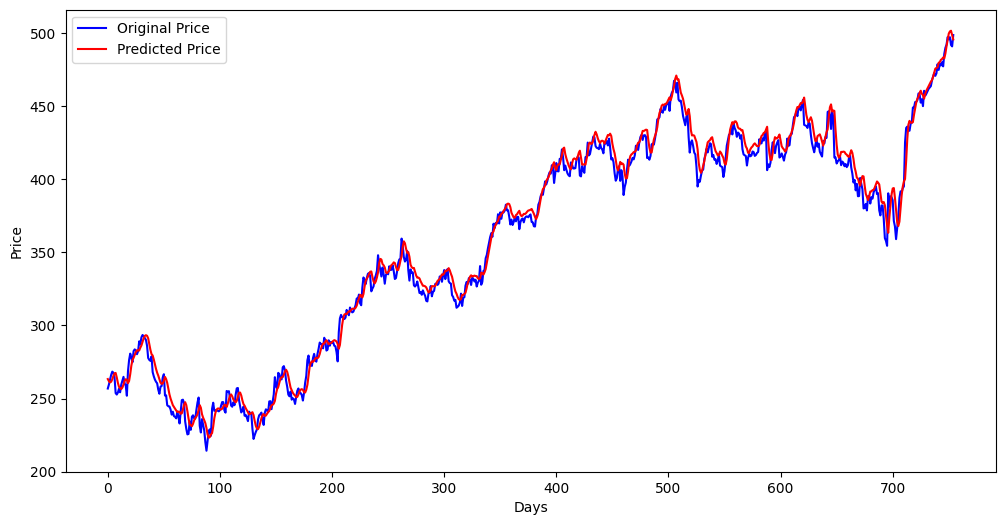

In [51]:
# original plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend();


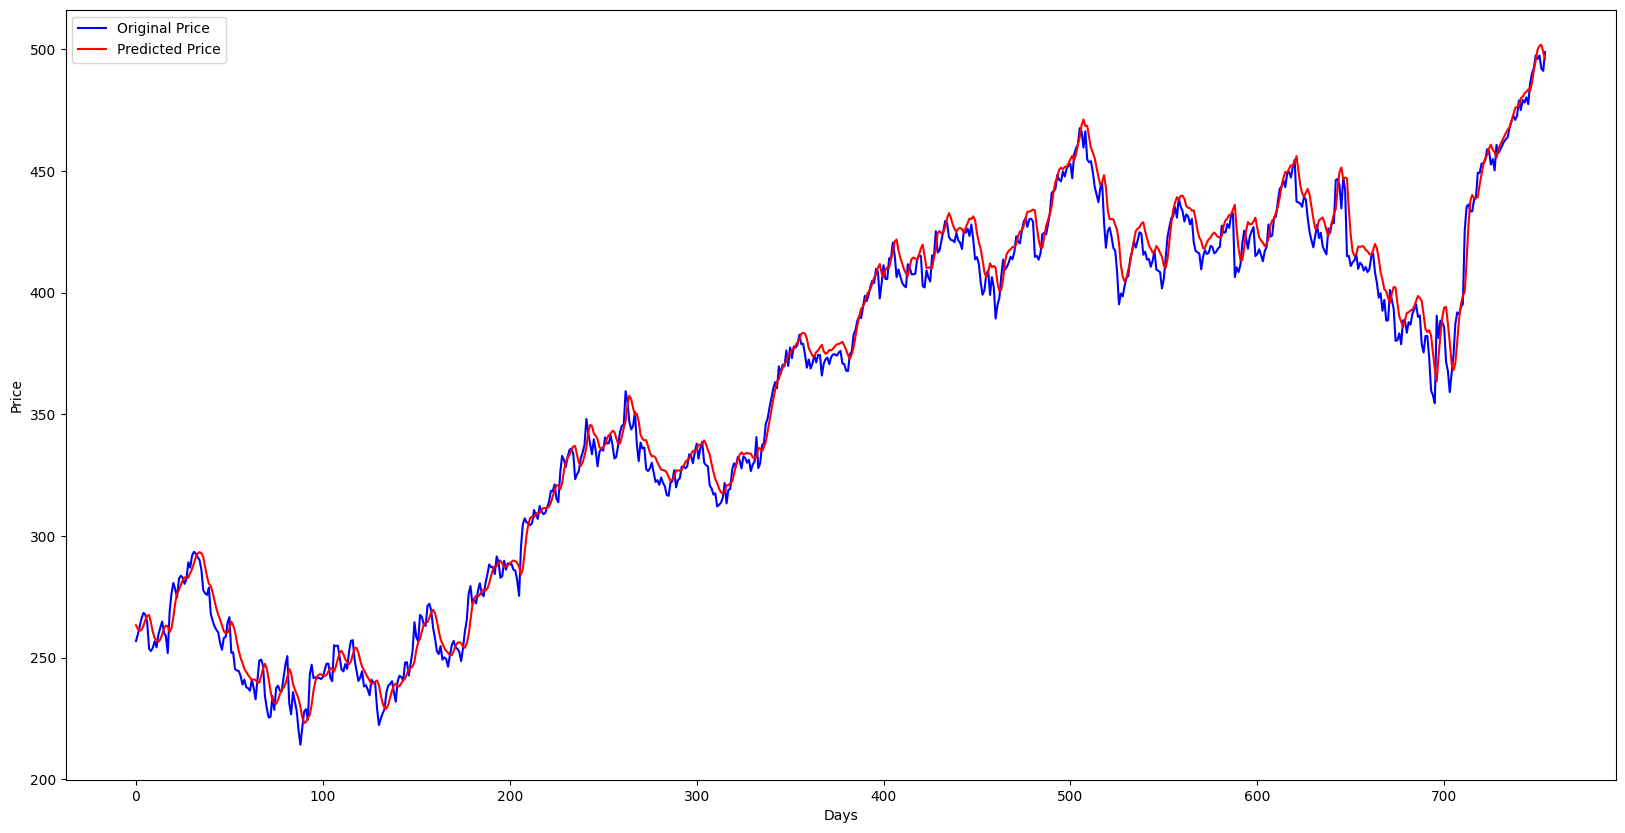

In [60]:
# zoomed plot
plt.figure(figsize=(20, 10))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend();

# 10.- Model Evaluation

In [66]:
# Mean squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score


In [65]:
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error (MSE): {mse}') #entre más bajo el resultado es mejor (se acerca más a lo esperado)

Mean Squared Error (MSE): 57.02944699157158


In [63]:
# Root Mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}') # entre más bajo el valor es mejor

Root Mean Squared Error (RMSE): 7.551784358121701


In [67]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}") # el valor debe estar entre 0 y 1 (si nuestro valor está cerca de 1 quiere decir que nuestra predicción es muy buena)

R-squared: 0.9895950756453424
